# Figures for our bachelor's thesis
With this file, we created figures that are used in our thesis.  

In [1]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import face_recognition
import PIL
from PIL import Image
from PIL import ImageFilter
import functools
import operator
from scipy.spatial import distance

## Demonstrating the facial feature detection

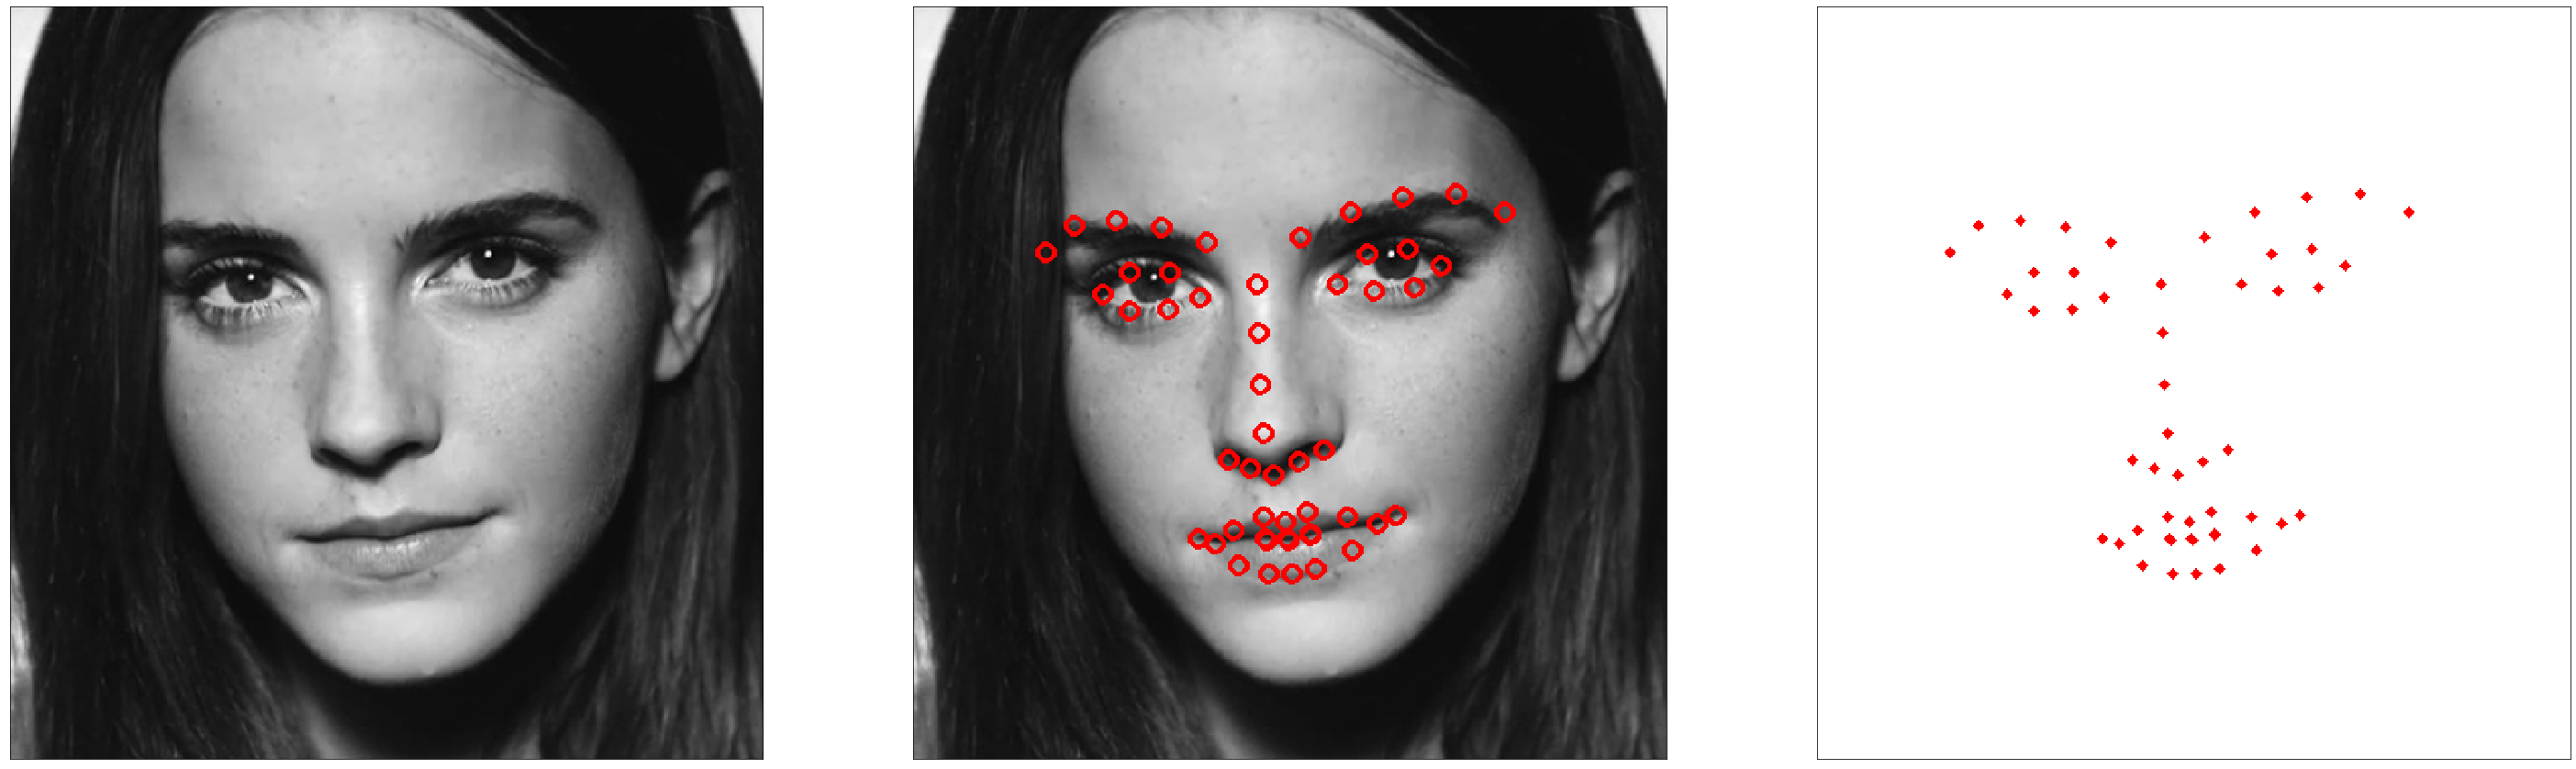

In [2]:
image = face_recognition.load_image_file("emma5.jpeg")

image = image[100:550,150:600]

img_landmarks = np.zeros(image.shape, dtype=np.uint8)
img_landmarks.fill(255)

fig, ax = plt.subplots(1,3, figsize=(50,100))
plt.subplot(1,3,1)
plt.imshow(image)
#plt.title('Input Image')
plt.xticks([])
plt.yticks([])
#plt.show()

face_landmarks_list = face_recognition.face_landmarks(image)
del face_landmarks_list[0]['chin']

for feature in face_landmarks_list[0]:
    for x in face_landmarks_list[0][feature]:
        cv2.circle(image,x,5,(255,0,0),2)
        cv2.circle(img_landmarks,x,1,(255,0,0),3)

plt.subplot(1,3,2)        
plt.imshow(image)
#plt.title('Image with detected landmarks')
plt.xticks([])
plt.yticks([])
#plt.show()


plt.subplot(1,3,3)
plt.imshow(img_landmarks)
#plt.title('Detected landmarks')
plt.xticks([])
plt.yticks([])
plt.show()

fig.savefig('landmarks.png')

### Taking a closer at the the single features detected

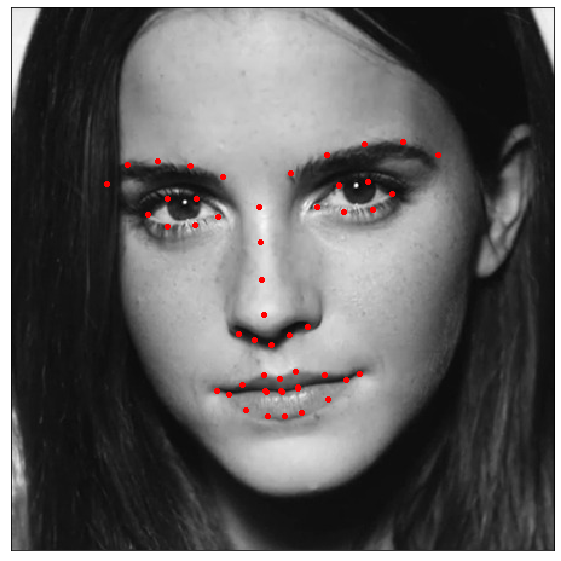

In [27]:
image = face_recognition.load_image_file("emma5.jpeg")

image = image[100:550,150:600]


face_landmarks_list = face_recognition.face_landmarks(image)
del face_landmarks_list[0]['chin']

for feature in face_landmarks_list[0]:
    for x in face_landmarks_list[0][feature]:
        cv2.circle(image,x,1,(255,0,0),2)

fig = plt.figure(figsize=(10,10))      
plt.imshow(image)
plt.xticks([])
plt.yticks([])


fig.savefig('landmarks-single.png')

In [12]:
for key in face_landmarks_list[0]:
    print(key)

left_eyebrow
right_eyebrow
nose_bridge
nose_tip
left_eye
right_eye
top_lip
bottom_lip


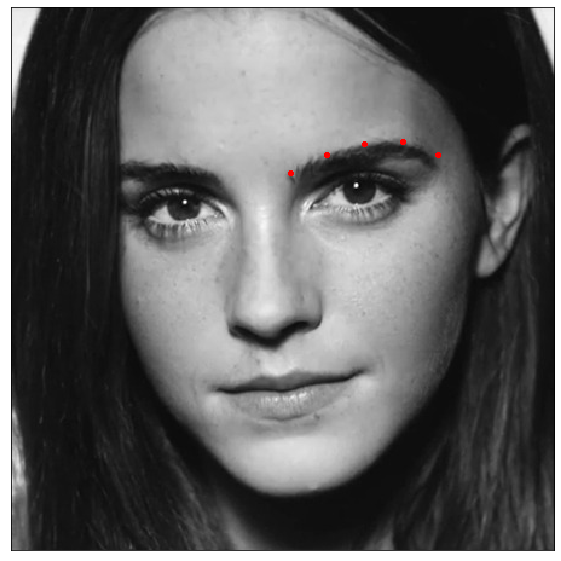

In [28]:
# EYEBROW

image = face_recognition.load_image_file("emma5.jpeg")

image = image[100:550,150:600]


face_landmarks_list = face_recognition.face_landmarks(image)

eyebrow = face_landmarks_list[0]['right_eyebrow']


for location in eyebrow:
    cv2.circle(image,location,1,(255,0,0),2)

fig = plt.figure(figsize=(10,10))      
plt.imshow(image)
plt.xticks([])
plt.yticks([])

fig.savefig('landmarks-eyebrow.png')

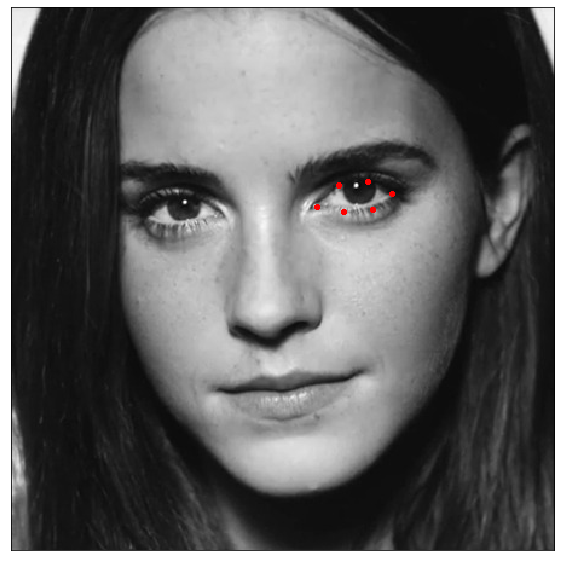

In [29]:
# EYE

image = face_recognition.load_image_file("emma5.jpeg")

image = image[100:550,150:600]

face_landmarks_list = face_recognition.face_landmarks(image)
del face_landmarks_list[0]['chin']
del face_landmarks_list[0]['left_eyebrow']
del face_landmarks_list[0]['right_eyebrow']
del face_landmarks_list[0]['nose_bridge']
del face_landmarks_list[0]['nose_tip']
del face_landmarks_list[0]['left_eye']
del face_landmarks_list[0]['top_lip']
del face_landmarks_list[0]['bottom_lip']

for feature in face_landmarks_list[0]:
    for x in face_landmarks_list[0][feature]:
        cv2.circle(image,x,1,(255,0,0),2)

fig = plt.figure(figsize=(10,10))      
plt.imshow(image)
plt.xticks([])
plt.yticks([])


fig.savefig('landmarks-eye.png')

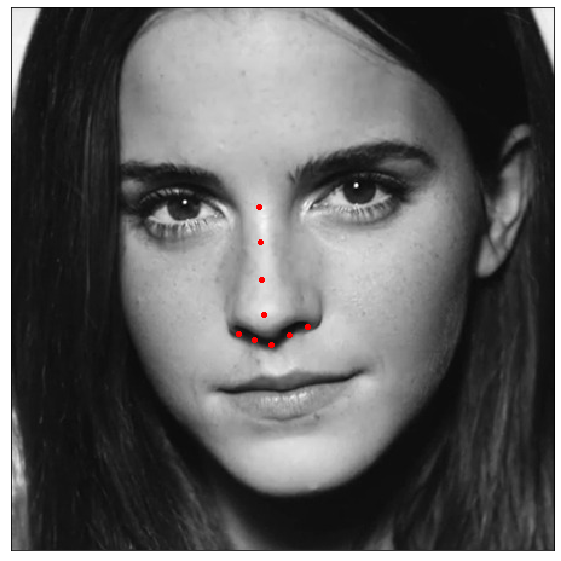

In [30]:
# NOSE

image = face_recognition.load_image_file("emma5.jpeg")

image = image[100:550,150:600]

face_landmarks_list = face_recognition.face_landmarks(image)
del face_landmarks_list[0]['chin']
del face_landmarks_list[0]['left_eyebrow']
del face_landmarks_list[0]['right_eyebrow']
del face_landmarks_list[0]['right_eye']
del face_landmarks_list[0]['left_eye']
del face_landmarks_list[0]['top_lip']
del face_landmarks_list[0]['bottom_lip']

for feature in face_landmarks_list[0]:
    for x in face_landmarks_list[0][feature]:
        cv2.circle(image,x,1,(255,0,0),2)

fig = plt.figure(figsize=(10,10))      
plt.imshow(image)
plt.xticks([])
plt.yticks([])


fig.savefig('landmarks-nose.png')

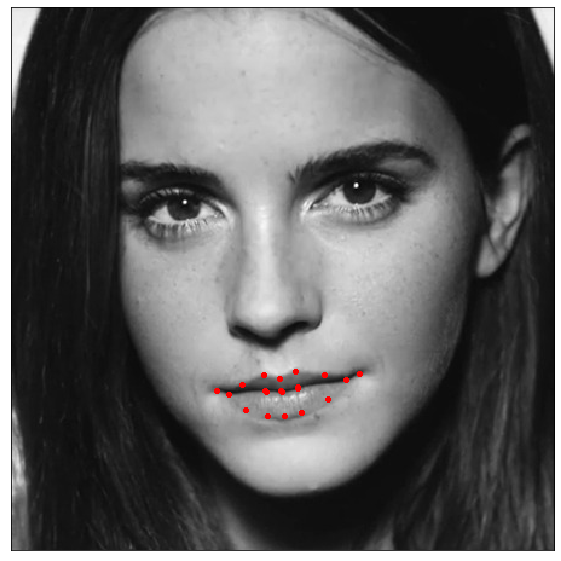

In [31]:
# MOUTH

image = face_recognition.load_image_file("emma5.jpeg")

image = image[100:550,150:600]

face_landmarks_list = face_recognition.face_landmarks(image)
del face_landmarks_list[0]['chin']
del face_landmarks_list[0]['left_eyebrow']
del face_landmarks_list[0]['right_eyebrow']
del face_landmarks_list[0]['right_eye']
del face_landmarks_list[0]['left_eye']
del face_landmarks_list[0]['nose_bridge']
del face_landmarks_list[0]['nose_tip']

for feature in face_landmarks_list[0]:
    for x in face_landmarks_list[0][feature]:
        cv2.circle(image,x,1,(255,0,0),2)

fig = plt.figure(figsize=(10,10))      
plt.imshow(image)
plt.xticks([])
plt.yticks([])


fig.savefig('landmarks-mouth.png')

### Demonstrating the use of the *face_landmarks* function

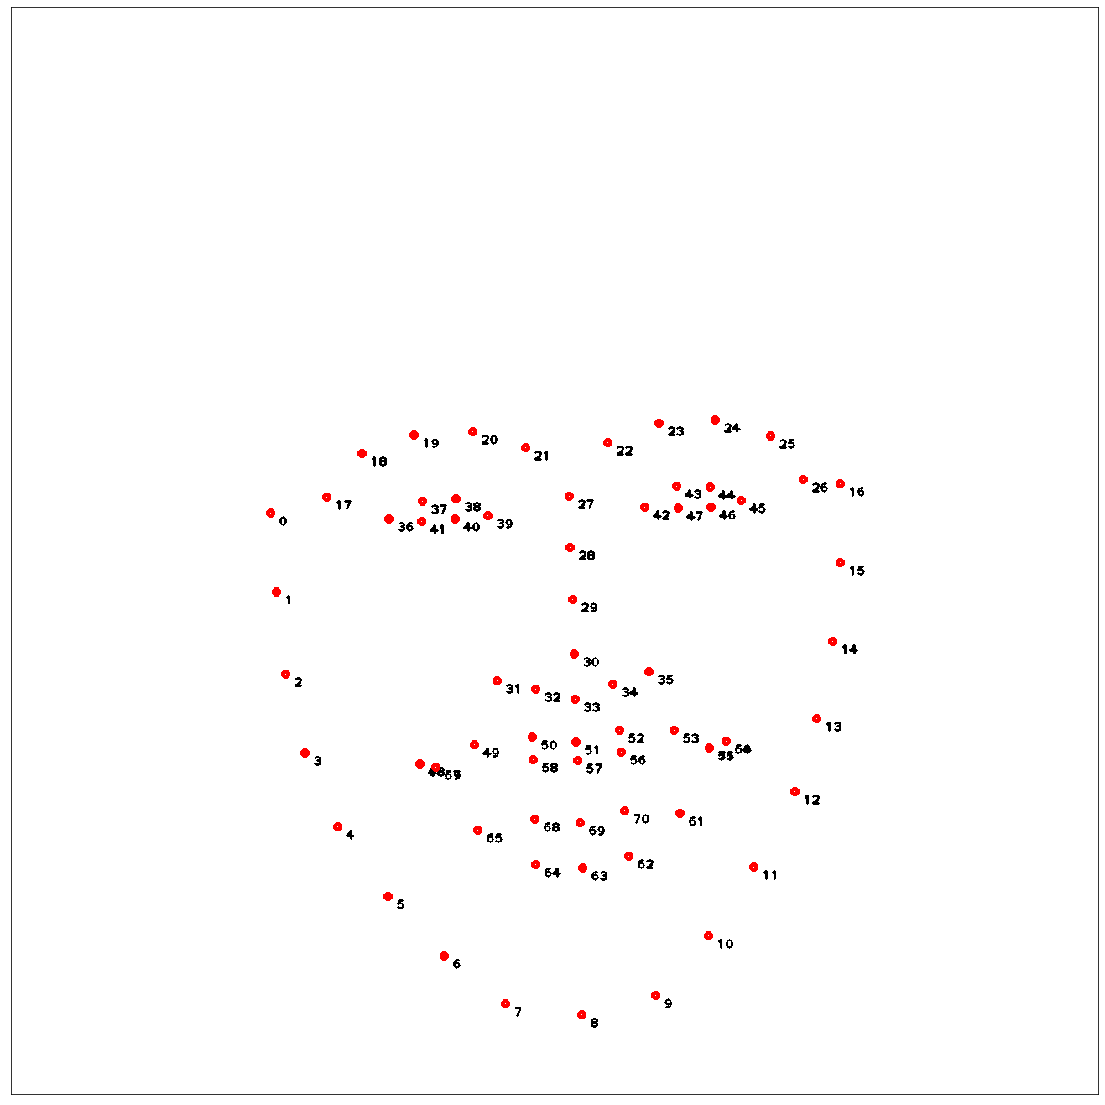

In [87]:
image = face_recognition.load_image_file("obama.jpg")

#image = image[100:550,150:600]

img_landmarks = np.zeros(image.shape, dtype=np.uint8)
img_landmarks.fill(255)


face_landmarks_list = face_recognition.face_landmarks(image)

counter = 0

for feature in face_landmarks_list[0]:
    for x in face_landmarks_list[0][feature]:
        cv2.circle(img_landmarks,x,3,(255,0,0),3)
        cv2.putText(img_landmarks,str(counter), (x[0]+10,x[1]+15), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,0),2)
        counter += 1

fig, ax = plt.subplots(1,1,figsize=(20,20))
plt.imshow(img_landmarks)
#plt.title('Detected landmarks')
plt.xticks([])
plt.yticks([])
plt.show()

fig.savefig('landmarks-plain.png')

## Showing the results of the applied filters

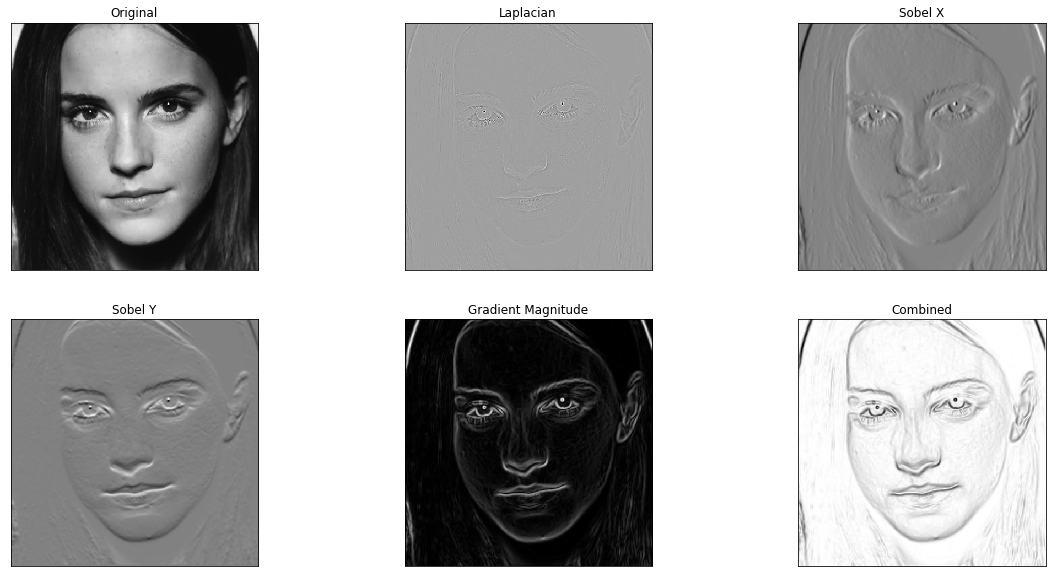

In [94]:
image = cv2.imread("emma5.jpeg",0)

image = image[100:550,150:600]
k=9
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=k)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=k)
laplacian = cv2.Laplacian(image,cv2.CV_64F)
weights=[1,1,1]
gradient_magnitude = np.sqrt(weights[0]*np.square(sobelx) + weights[1]*np.square(sobely) + weights[2]*np.square(laplacian))
gradient_magnitude *= 255.0 / gradient_magnitude.max()
combined_filters = (255-gradient_magnitude)

fig,ax = plt.subplots(2,3,figsize=(20,10))
        
plt.subplot(2,3,1)
plt.imshow(image,cmap = 'gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,2)
plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian')
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,3)
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,4)
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,5)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,6)
plt.imshow(combined_filters, cmap='gray')
plt.title("Combined")
plt.xticks([])
plt.yticks([])

plt.show()

fig.savefig('filters.png')